# Statistics Fundamentals

We'll cover:
- Intro:
    - Definition
    - Importance of Statistics for Data Science
    - Common Terms Used in Statistics
    - Statistics Types
- Types of Data
- Statistical Measures:
    - Univariate Analysis
        - Measures of Central Tendency
        - Measures of Dispersion
        - Measures of Shape
    - Multivariate Analysis
        - Covariance and Correlation

In [37]:
import pandas as pd
import numpy as np

## Intro
### What is Statistics?
- A part of mathematics that involves the collection, analysis, interpretation, presentation, and organization of data.
- It's a discipline that deals with collection, description, analysis, and inference of conclusions from quantitative data and qualitative (notes: there are techniques to perform stats on categorical data - e.g. chi square test)
- Along with the output that statistical analysis provides, we can also get confidence intervals that helps understand how certain we are about a conclusion.

### Importance of Statistics
- The first step in every DS project is to explore and interpret the data
- Statistics helps us extract impactful findings and define an object

### Common Terms Used in Statistics
- **Population and Sample:** 
    - A **population** is the complete pool from which the sample is drawn for further analysis. 
    - A **sample** is a subset of the **population**
    - We cannot perform analysis on the full population. It's costly and time consuming. e.g. studying the rate of obesity in the US. It's nearly impossible to record data for every US Citizen (330 M people) Instead, we can use a subset from each state.
    - Therefore, it's essential to have a good sample at hand. The sample should be **good representative** of the population.
- **Measurement:** it's a number or attribute calculated or measured for each member of the sample.e.g. Weight, Blood Pressure, Vehicle Speed, etc..
- **Parameter** it's a characteristic of the population. e.g. population mean
- **Statistic** it's a characteristic of the sample. e.g. sample mean
- **Distribution** it refers to how the sample data is spread across a range of values 


In [38]:
data = {
    #'key':'value'
    'name':['John', 'Becky','Tammy', 'Chad', 'Mark', 'Nancy'],
    'age':[45,32,27,36, 32, 30],
    'score':[99,87,92,80, 84, 75],
    'city':['Atlanta','Chicago','Los Angeles', 'Chicago', 'Atlanta', 'Atlanta']
}

df = pd.DataFrame(data)
df

,name,age,score,city
0,John,45,99,Atlanta
1,Becky,32,87,Chicago
2,Tammy,27,92,Los Angeles
3,Chad,36,80,Chicago
4,Mark,32,84,Atlanta
5,Nancy,30,75,Atlanta


- df is a sample from all the students of school (population)
- row 0, for example, is a record or a member of the sample

### Sampling Techniques:
- Random Sampling: every member of the population has an equal chance of being selected
- Stratified Sampling: Divide the population into subgroups (strata) and sample from each subgroup (stratum)
- Snowball Sampling: For example, using a survey recruit initial participants to respond, who can also recruit others

## Types of Statistics

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_06_Maths_and_Stats/Statistics_Fundamentals/Image_1.png)


- **Descriptive** it involves displaying, analyzing, and describing the data e.g. average BMI, max HP for a car, lowest school grade, etc.. 
- **Inferential** it involves building conclusions (inferences) about the population based on the sample. e.g. increase of blood pressure is causing a heart attack. In other words, hypothesize if the trend or behavior of a sample is true for population
- **Predictive** it involves extracting information from the data and using it to predict trends, behavior, patterns, or relationships between attributes. e.g. predicting the cost of goods when inflation is high or predicting the demand os pare parts when we observe a rise in car sales

- descriptive tells you "what is," inferential tells you "what likely is" based on a sample, and predictive tells you "what might be" in the future.

## Types of Data

- Categorical Data:  It represents characteristics, such as gender, blood type, country, marital status, car model, age group, etc...

- Numerical(Numeric) Data: It represents the data as a measurement, such as height, age, weight, blood pressure, sales

### Is date considered categorical or numerical?
- It depends on the context of the date element
- If we extract seconds from a date-timestamp -> numeric
- Date by default can be considered categorical if we're using it group the data by month, year, week, etc...
- It's a packaged data element where you can extract both numerical and categorical data

## Statistical Measures

### Measures of Central Tendency
- A measure of central tendency is a summary that describes the central position of the dataseet. 
- Keep in mind, if the data is skewed, those measures do not represent the exact center on the x-axis.
- They are also called the 3Ms: Mean, Median, and Mode

#### Mean
- The most popular statistical measure 
- mean = total of all data points divided by the count of the data points

In [39]:
# using pandas 
df['age'].mean(skipna=True) #use skip na to avoid counting for nulls

33.666666666666664

In [40]:
#using numpy
np.mean(df['age'])

33.666666666666664

In [41]:
#using statistics

import statistics as stat

stat.mean(df['age'])

33.666666666666664

> Using NumPy or Pandas is the recommended way for best performance.

#### Median

- The middle number obtained after arranging the data in ascending or descending order
- For an odd number of items in the list, it's straightforward to select the number in the middle
- For an even number of items in the list, you need to take the average of the 2 numbers in the middle. For example, for array `[4, 5, 6, 7, 8, 9, 10, 11]` we take the average of 7 and 8.

In [42]:
#using pandas
df['age'].median()

32.0

In [43]:
#using numpy
np.median(df['age'])

32.0

#### Mode
- It's the most frequent item on the list
- It's the only measure of central tendency that works with both categorical and numeric data

In [44]:
# using statistics
x = ['Red', 'Blue', 'Green', 'Red', 'Red', 'Blue']
stat.mode(x) 

'Red'

Numerical data:

In [45]:
df['city'].mode()

0    Atlanta
Name: city, dtype: object

In [46]:
df['score'].mode()

0    75
1    80
2    84
3    87
4    92
5    99
Name: score, dtype: int64

If all numbers have the same occurance, pandas will list all the options.

In [47]:
df['age'].mode()

0    32
Name: age, dtype: int64

### Measures of Dispersion

- The mean may pose problems in terms of describing the data. It could be unrliable on its own for 2 reasons:
    1. It's sensitive to ourliers
    2. It may not be enough to describe the difference and full characteristics of datasets
- Measure of Dispersion can help explain the differences between datasets if they share the same mean
- It is also known as the measures of variability because they're used to understand the extend of spread or diversity

In [48]:
# Dataset 1
data1 = np.array([3,5,6,7,8])

# Dataset 2
data2 = np.array([2,5,5,8,9])

# Dataset 3
data3 = np.array([2,4,4,9,10])

In [49]:
print('Data 1 mean:',np.mean(data1))
print('Data 2 mean:',np.mean(data2))
print('Data 3 mean:',np.mean(data3))

Data 1 mean: 5.8
Data 2 mean: 5.8
Data 3 mean: 5.8


**Observation** 
- Despite the fact all 3 datasets don't look the same, they have the same average. 
- The average/mean is not giving the full picture.
- Therefore, we need another measure that explains that all 3 datasets are different

In [50]:
print('Data 1 Standard Deviation:',np.std(data1))
print('Data 2 Standard Deviation:',np.std(data2))
print('Data 3 Standard Deviation:',np.std(data3))

Data 1 Standard Deviation: 1.7204650534085253
Data 2 Standard Deviation: 2.4819347291981715
Data 3 Standard Deviation: 3.1240998703626617


#### Standard Deviation
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_05_Data_Visualization/standard_deviation.png)



- Explains the dispersion of the data. For example, it shows that all 3 datasets are dispersed differently.
- It's the most popular measure of dispersion
- It measures the spread of data around the mean
- It's defined as the square root of sum of squares of the deviation around the mean divided by the number of observations


#### Variance
- It's the expected value of the squared deviation from the mean
- In other words, it's the squared value of the Standard Deviation

#### Range
- It's the difference between the largest and smallest data points in the dataset.
- It's sensitive to outliers

In [51]:
df['age'].max() - df['age'].min()

18

In [52]:
#method 2
x = [ 2,3,4,3,2,6,2,3]

np.max(x) - np.min(x)

4

### Percentiles, Quintiles, and Quartiles
They are statical concepts used to divide the data into equal parts, helping understand the position of a single data point and distribution of the data

- **Percentiles** divide data into 100 equal parts, with each part representing a percentage of the data. Common percentiles include:
    - 25th percentile (Q1 or P25): 25% of data falls below this value.
    - 50th percentile (Q2 or P50, also known as the median): 50% of data falls below this value.
    - 75th percentile (Q3 or P75): 75% of data falls below this value.
    - 90th percentile (P90): 90% of data falls below this value.
- **Quartiles** divide the data into 4 equal parts
- **Quintiles** divide the data into 5 equal parts
- There are no data points above the 100th percentile. It's basically the max value

- Percentiles show the percentage of data below a certain value.
- Percentiles are useful for understanding the distribution of data.
- Percentiles can help identify outliers or extreme values.
- Example: Suppose you have exam scores from 100 students:
    - 25th percentile (Q1): 60 (25% of students scored below 60)
    - 50th percentile (Q2 or median): 75 (50% of students scored below 75)
    - 75th percentile (Q3): 85 (75% of students scored below 85)
    - 90th percentile: 92 (90% of students scored below 92)

![perc](https://healthdataviz.com/uploads-from-previous-versions/wordpress/wp-content/uploads/2019/05/score-key-01.png)

In [53]:
x = np.array([1,2,3,6,8,9,12,23,10,11,5,3,17,14])
percentile_30th = np.percentile(x, 30)
percentile_30th

4.8

In [54]:
len(x)

14

- 4.8 is the threshold where 70% of my data exists on the right side and 30% of my data exists on the left side
- all data points above 4.8 are considered in the top 70 by value
- all data points below 4.8 are considered in the bottom 30 by value

In [55]:
my_ser = pd.Series(np.random.randint(45,200,600))
my_ser.head()

0    137
1     69
2     99
3    157
4    141
dtype: int64

In [56]:
my_ser.max()

199

In [57]:
my_ser.describe()

count    600.000000
mean     120.678333
std       45.439000
min       45.000000
25%       82.000000
50%      119.000000
75%      161.250000
max      199.000000
dtype: float64

<Axes: >

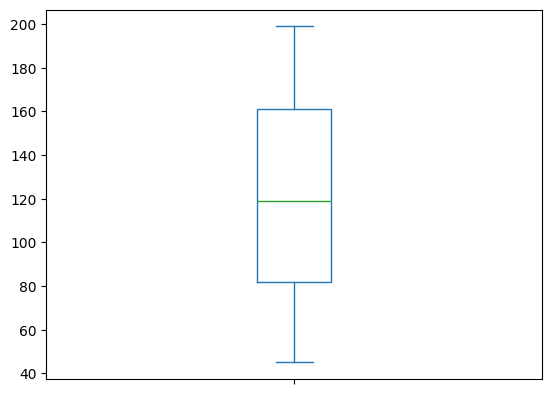

In [58]:
my_ser.plot.box()

- 50% of my population is below 154. This point is also called the **median**.
- a quarter of my population is below 77 (25th percentile).
- 3 quarters of my population is below 221 (75th percentile).
- 299.85 is the max - also called the 100th percentile.
- 25, 50, and 75 are also called **quartiles** because they divide the data into 4 quarters.

#### Interquartile Range

![link text](https://online.stat.psu.edu/stat200/sites/stat200_fa21/files/inline-images/Boxplotwithdescriptions.png)

- The interquartile range is the distance between Q1 and Q3 (25th and 75th percentiles)
- It describes the middle 50% of the observations
- It is used to derive formulas for upper and lower ranges for outlier treatment

In [59]:
np.percentile(my_ser, [90,95])

array([184., 191.])

### Measures of Shape

#### Skewness

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_05_Data_Visualization/skew.png)

- Skewness is a measure of asymmetry or distortion of symmetric distribution. 
- It measures the deviation of the given distribution of a random variable from a symmetric distribution, such as normal distribution. 
- A normal distribution is without any skewness, as it is symmetrical on both sides.
- Having outliers causes skewness

<Axes: >

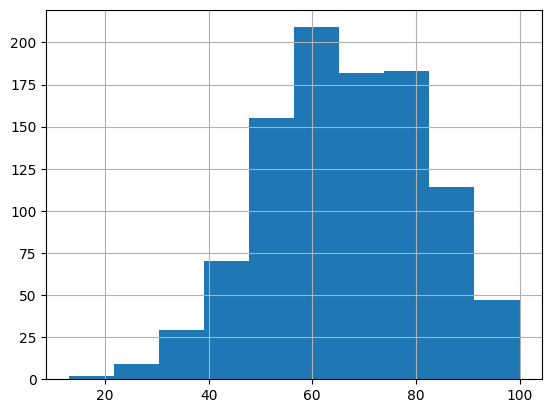

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/school_grades.csv')

df['math score'].hist()

In [ ]:
sns.histplot(df[df['math score']>30]['math score'], kde=True)

In [52]:
a = [5,7,10,12]
np.mean(a)

8.5

In [54]:
b = [5,7,10,50]
np.mean(b)

18.0

- in array a, the average is giving a good representation of the center of the data
- array b, on the other hand, has extreme values and the average is not a good representation of the center of the data
- b is skewed because of it's extreme value or long tail

In [56]:
from scipy.stats import skew
skew(b)

1.1232115519647907

B is positively skewed because the number is higher than 0

![meanmedianmode.png](https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2021_12_art11-1.jpg)

- Positive Skew (Right Skew): if the skewness value > 0 (positive), the distribution tail is stretched more to the **right** side of the x-axis
- Negative Skew (Left Skew): if the skewness value <> 0 (negative), the distribution tail is stretched more to the **left** side of the x-axis
- Zero Skewness: the value is or very close to zero. The distribution is fairly symmetric.


In [59]:
#example of negative skew

c = [0.04,7,12,11]
skew(c)

-0.6832289141093296

#### Kurtosis


- Data with high kurtosis tend to have heavy tails or outliers
- If Kurtosis is low, there will be minimum outliers
- A minimum kurotsis shows that the data is normally distributed

![positivenegativekurt.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Probimages/Statistics_Fundamentals/Statistics_Notebookupdated/positivenegativekurt.PNG)


##### **What is Kurtosis?**
Kurtosis is a statistical measure that describes the **shape of a distribution’s tails** in relation to its overall shape. Specifically, it measures the **tailedness** of the distribution—how much of the data is in the tails compared to the center.

- **Kurtosis is often compared to the normal distribution** (which has a kurtosis of 3, also called **mesokurtic**).
- It helps you understand whether the data has **heavy tails** (outliers) or **light tails** (lack of outliers) compared to a normal distribution.

---

##### **Types of Kurtosis**
1. **Mesokurtic (Kurtosis = 3)**:
   - The distribution has tails similar to a normal distribution.
   - Example: A perfectly normal distribution.

2. **Leptokurtic (Kurtosis > 3)**:
   - The distribution has **fatter tails** and a **sharper peak** than a normal distribution.
   - Indicates more data in the tails (more outliers).
   - Example: Financial returns data often has high kurtosis because of extreme values.

3. **Platykurtic (Kurtosis < 3)**:
   - The distribution has **thinner tails** and a **flatter peak** than a normal distribution.
   - Indicates less data in the tails (fewer outliers).
   - Example: Uniform distributions have low kurtosis.

---

**How to Calculate Kurtosis**
In Python, you can calculate kurtosis using libraries like `pandas` or `scipy`:

```python
import pandas as pd

# Example: Calculate kurtosis for a column in a DataFrame
data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4, 5])
kurtosis_value = data.kurtosis()
print("Kurtosis:", kurtosis_value)
```

- In `pandas` the threshold is different  **Interpretation**:
  - If `kurtosis > 0`, the distribution is **leptokurtic** (heavy tails).
  - If `kurtosis < 0`, the distribution is **platykurtic** (light tails).
  - If `kurtosis = 0`, the distribution is **mesokurtic** (normal tails).

---

##### **How Kurtosis is Used in Data Analysis**
1. **Identifying Outliers**:
   - High kurtosis (leptokurtic) indicates the presence of outliers or extreme values in the dataset.
   - Example: In financial data, high kurtosis might indicate the risk of extreme losses or gains.

2. **Assessing Normality**:
   - Kurtosis is used in conjunction with skewness to assess whether a dataset is normally distributed.
   - Many statistical tests (e.g., t-tests, ANOVA) assume normality, so kurtosis helps validate this assumption.

3. **Risk Management**:
   - In finance, kurtosis is used to measure the risk of investments. High kurtosis indicates a higher probability of extreme returns (both positive and negative).

4. **Quality Control**:
   - In manufacturing, kurtosis can help identify variations in product quality. A leptokurtic distribution might indicate inconsistent production processes.

5. **Comparing Distributions**:
   - Kurtosis helps compare the tail behavior of different datasets. For example, comparing the kurtosis of two financial assets can reveal which one has more extreme returns.


##### **Key Takeaways**
- Kurtosis measures the **tailedness** of a distribution.
- It helps identify **outliers**, assess **normality**, and compare distributions.
- High kurtosis indicates heavy tails (more outliers), while low kurtosis indicates light tails (fewer outliers).

By combining kurtosis with skewness, you can get a complete picture of the shape of your data distribution and make more informed decisions in your analysis. Let me know if you’d like further clarification or examples!

#### Covariance and Correlation
- Previous measures fall under the category of **Univariate** Analysis as it deals with a single variable/array/column/series.
- Covariance and Correlation, on the other hand, deal with **Multivariate** Analysis (Relationship between 2 or more variables)
- They measure the relationship and dependency between two variables.
- numerical variables only

#### Covariance

![covsample.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Probimages/Statistics_Fundamentals/Statistics_Notebookupdated/covsample.PNG)
- It gives the direction of the relationship
- The direction value can be interpreted as:
    - Negative means if x goes up, y goes down (and vice-versa)
    - Positive means if x goes up, y goes up (and vice-versa)

#### Correlation
![corelation.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Probimages/Statistics_Fundamentals/Statistics_Notebookupdated/corelation.PNG)
- Correlation is the most common measure of the two and most useful
- Also called the Pearson correlation
- It provides both relationship direction and magnitude (correlation coefficient)
- Correlation Coefficient Value Interpretation: It ranges between -1 and 1
    - 0 or close to 0 means no or very low correlation
    - close to -1 means the two variables are highly negatively correlated
    - close to 1 means the two variables are highly positively correlated

In [ ]:
data = {
            'income':[10000, 20000, 15000, 25000],
            'age': [25, 34, 27, 37],
            'stress_score': [95, 60, 90, 57],
            'movies_watched': [7,4,4,9] 
}

df = pd.DataFrame(data)
df

,income,age,health_score,movies_watched
0,10000,25,95,7
1,20000,34,60,4
2,15000,27,90,4
3,25000,37,57,9


In [63]:
df.corr()

,income,age,health_score,movies_watched
income,1.000000,0.977525,-0.940153,0.316228
age,0.977525,1.000000,-0.987000,0.335480
health_score,-0.940153,-0.987000,1.000000,-0.233988
movies_watched,0.316228,0.335480,-0.233988,1.000000


- Column `movies_watched` has no relationship with other column (low positive correlation with other columns)
- Columns `income` and `age` have **high positive correlation**. If `age` goes up, `income` does too.
- Columns `age` and `health_score` have **high negative correlation**. If `age` goes up, `health_score` goes down

> Commonly, you want to find variables with absolute score higher than 60% or 0.6 (in both negative or positive directions) to say they are highly correlated

In [ ]:
df.plot.scatter(x='reading score', y='writing score')

Yes, **using a correlation matrix for a classification problem is generally not very useful**, but it depends on the context. Here's why:  

### **Why a Correlation Matrix Isn't Ideal for Classification**
1. **Correlation Measures Linear Relationships Between Continuous Variables**  
   - A **correlation matrix** (typically Pearson correlation) measures how **continuous numeric variables** move together.  
   - **Classification problems** often involve **categorical target variables**, making correlation less meaningful.  

2. **Doesn't Work Well with Categorical Labels**  
   - A correlation matrix can't directly handle a categorical target (`0/1`, `A/B/C` labels).  
   - Example: Trying to find correlation between `income` and `loan_approval (yes/no)` isn’t straightforward.  

3. **Better Alternatives Exist**  
   - Instead of a correlation matrix, use:  
     ✅ **Chi-Square Test** → Measures dependence between categorical variables.  
     ✅ **ANOVA/F-test** → Measures variance between groups.  
     ✅ **Mutual Information** → Measures information gain between features and target.  
     ✅ **Feature Importance from a Model** → Helps rank feature relevance.

---

### **When Can Correlation Be Useful in Classification?**
🚀 **If your features are continuous**, you **can** still use a correlation matrix to:  
✅ Identify **multicollinearity** (e.g., if two features are highly correlated, one may be redundant).  
✅ Explore relationships between **numeric features** before training a model.  

---

### **Conclusion**  
❌ **A correlation matrix isn't useful for directly analyzing a categorical target.**  
✅ **It can help find feature relationships in numeric data before modeling.**  
For classification tasks, use **mutual information, chi-square tests, or feature importance scores** instead. 🚀